# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [23]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
  words = set()
  lines = email.split('\n')

  for line in lines:
    terms = line.split()
    for word in terms:
      words.add(word)
  return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
  stemmer = PorterStemmer()
  stem_words = {stemmer.stem(word) for word in words}
  return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stem_words):
  stop_words = set(stopwords.words('english'))
  stem_no_stop_words = []
  for word in stem_words:
    if word not in stop_words:
      stem_no_stop_words.append(word)
  return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(i, vocab, stem_words):
  for word in stem_words:
    if word not in vocab:
      vocab[word] = i 
      i += 1
  return vocab

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_words, vocab):
  bow = [0]*len(vocab)
  for word in stem_words:
    bow[vocab[word]] = 1
  return bow

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data(url):
  with open(url, 'r') as f:
    data_labels = []
    data_emails = []
    for i in range(3002):
      content = f.readline()
      if i == 0 or i == 1:
        continue
      emails = content.split(',')
      if(len(emails[:-1]) == 0):
        continue
      if emails[-1] == '0\n':
        data_labels.append(0)
        data_emails.append(emails[:-1][0])
      elif emails[-1] == '1\n':
        data_labels.append(1)
        data_emails.append(emails[:-1][0])
  dataset = {}
  dataset["email"] = [email for email in data_emails]
  dataset["label"] = data_labels
  
  #Shuffling the dataset
  data_list = []
  for i in range(len(dataset["email"])):
    data_list.append((dataset["email"][i], dataset["label"][i]))
  np.random.shuffle(data_list)
  shuffled_emails = []
  shuffled_labels = []
  for email in data_list:
    shuffled_emails.append(email[0])
    shuffled_labels.append(email[1])
  dataset["email"] = shuffled_emails
  dataset["label"] = shuffled_labels
  emails = dataset["email"]
  labels = dataset["label"]
  print("Total number of emails:", len(emails))
  print("Total number of labels:", len(labels))
  bow_emails = []
  vocab = {}
  index = 0
  print("Building the vocabulary..")
  for i, email in enumerate(emails):
    if type(email)==float or len(email) == 0 or type(email) == list:
      continue
    if i%500 == 0:
      print("Processed email number :", i)
    words = read_email(email)
    stem_words = stemming(words)
    stem_no_stop_words = remove_stop_words(stem_words)
    vocab = build_vocabulary(index, vocab, stem_no_stop_words)
    index = len(vocab)
  email_bow = []
  labels_bow = []
  print("Building vocabulary complete!!")
  print("Creating the bag-of-words representation..")
  for i, email in enumerate(emails):
    if type(email)==float or len(email) == 0 or type(email) == list:
      continue
    if i%500 == 0:
      print("Processed email number :", i)
    words = read_email(email)
    stem_words = stemming(words)
    stem_no_stop_words = remove_stop_words(stem_words)
    bow = get_bow(stem_no_stop_words, vocab)
    email_bow.append(bow)
    labels_bow.append(labels[i])
  print("bag-of-words representation created!")
  data = {}
  data["emails"] = email_bow
  data["labels"] = labels_bow
  return data

In [24]:
data = read_data('spam_or_not_spam.csv')

Total number of emails: 2999
Total number of labels: 2999
Building the vocabulary..
Processed email number : 0
Processed email number : 500
Processed email number : 1000
Processed email number : 1500
Processed email number : 2000
Processed email number : 2500
Building vocabulary complete!!
Creating the bag-of-words representation..
Processed email number : 0
Processed email number : 500
Processed email number : 1000
Processed email number : 1500
Processed email number : 2000
Processed email number : 2500
bag-of-words representation created!


In [25]:
X = data["emails"]
y = data["labels"]
print("The length of vocabulary is:", len(X[0]))
print("Total number of emails:", len(X))
print("Total number of labels:", len(y))

The length of vocabulary is: 25743
Total number of emails: 2998
Total number of labels: 2998


### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

Printing the top 30 most frequent words..


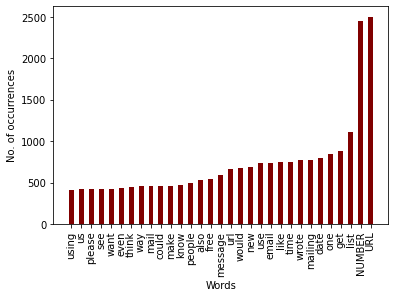

Printing the top 30 most frequent words in spam emails..


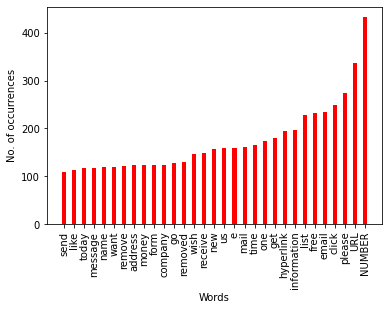

Printing the top 30 most frequent words in non-spam emails..


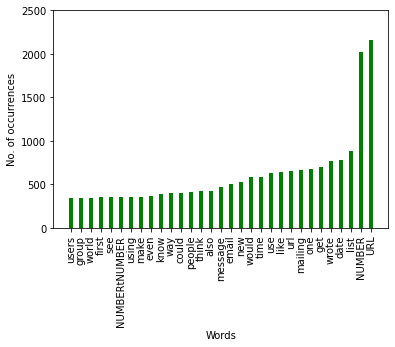

In [26]:
import matplotlib.pyplot as plt

# visuallze data distribution
def data_vis(dataset):
  emails = dataset["email"]
  labels = dataset["label"]
  freq = {}
  spam_freq = {}
  nonspam_freq = {}
  for i,email in enumerate(emails):
    if type(email) == float:
      continue
    words = remove_stop_words(read_email(email))
    for word in words:
      if word[0] == "_":
        continue
      if labels[i] == 1:
        if word in spam_freq:
          spam_freq[word]+=1
        else:
          spam_freq[word]=1
      else:
        if word in nonspam_freq:
          nonspam_freq[word]+=1
        else:
          nonspam_freq[word]=1  

      if word in freq:
        freq[word]+=1       
      else:
        freq[word]=1
  freq=dict(sorted(freq.items(),key= lambda x:x[1]))
  spam_freq = dict(sorted(spam_freq.items(),key= lambda x:x[1]))
  nonspam_freq = dict(sorted(nonspam_freq.items(),key= lambda x:x[1]))
  xs = list(freq.keys())[len(freq)-31:]
  ys = list(freq.values())[len(freq)-31:]
  print("Printing the top 30 most frequent words..")
  plt.bar(xs, ys, color ='maroon', width = 0.5)
  plt.xticks(rotation = 90)
  plt.xlabel("Words")
  plt.ylabel("No. of occurrences")
  plt.show()

  xs = list(spam_freq.keys())[len(spam_freq)-31:]
  ys = list(spam_freq.values())[len(spam_freq)-31:]
  print("Printing the top 30 most frequent words in spam emails..")
  plt.bar(xs, ys, color ='red', width = 0.4)
  plt.xticks(rotation = 90)
  plt.xlabel("Words")
  plt.ylabel("No. of occurrences")
  plt.show()

  xs = list(nonspam_freq.keys())[len(nonspam_freq)-31:]
  ys = list(nonspam_freq.values())[len(nonspam_freq)-31:]
  print("Printing the top 30 most frequent words in non-spam emails..")
  plt.bar(xs, ys, color ='green', width = 0.4)
  plt.xticks(rotation = 90)
  plt.yticks(np.arange(0,3000, 500))
  plt.xlabel("Words")
  plt.ylabel("No. of occurrences")
  plt.show()
  return

data_vis(dataset)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# split dataset
def split(data, test_size = 0.2):
  train_data = {}
  test_data = {}
  X = data["emails"]
  y = data["labels"]
  train_emails = X[:int(test_size*len(X))]
  test_emails = X[int(test_size*len(X)):]
  train_labels = y[:int(test_size*len(y))]
  test_labels = y[int(test_size*len(y)):]
  print("Successfully splitted the dataset!")
  train_data["emails"] = train_emails
  train_data["labels"] = train_labels
  test_data["emails"] = test_emails
  test_data["labels"] = test_labels
  return train_data, test_data

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data, test_data):
  predict_labels = {}
  classifier = svm.SVC()
  X_train = train_data["emails"]
  y_train = train_data["labels"]
  X_test = test_data["emails"]
  print("Starting the training for svm classifier...")
  classifier.fit(X_train, y_train)
  print("SVM classifier Training completed!")
  train_predictions = classifier.predict(X_train)
  test_predictions = classifier.predict(X_test)
  print("SVM Predictions collected!")
  predict_labels["train"] = train_predictions
  predict_labels["test"] = test_predictions
  return train_predictions, test_predictions

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data, test_data):
  predict_labels = {}
  X_train = train_data["emails"]
  y_train = train_data["labels"]
  X_test = test_data["emails"]
  print("Starting the training for knn classifier...")  
  classifier = KNeighborsClassifier()
  classifier.fit(X_train, y_train)
  print("KNN classifier Training completed!")
  train_predictions = classifier.predict(X_train)
  test_predictions = classifier.predict(X_test)
  print("KNN Predictions collected!")
  return train_predictions, test_predictions

train_data, test_data = split(data, 0.2)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

Successfully splitted the dataset!
Starting the training for svm classifier...
SVM classifier Training completed!
SVM Predictions collected!
Starting the training for knn classifier...
KNN classifier Training completed!
KNN Predictions collected!


### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [28]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  acc = metrics.accuracy_score(true_labels, predicted_labels)
  return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
  auc = metrics.auc(true_labels, predicted_labels)
  return auc

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
print("Training accuracy for SVM classifier:", compute_accuracy(train_data["labels"], svm_train_predictions))
print("Testing accuracy for SVM classifier:", compute_accuracy(test_data["labels"], svm_test_predictions))
print("Training accuracy for KNN classifier:", compute_accuracy(train_data["labels"], knn_train_predictions))
print("Testing accuracy for KNN classifier:", compute_accuracy(test_data["labels"], knn_test_predictions))
print("Training AUC score SVM classifier:", compute_accuracy(train_data["labels"], svm_train_predictions))
print("Testing AUC score SVM classifier:", compute_accuracy(test_data["labels"], svm_test_predictions))
print("Training AUC score for KNN classifier:", compute_accuracy(train_data["labels"], knn_train_predictions))
print("Testing AUC score for KNN classifier:", compute_accuracy(test_data["labels"], knn_test_predictions))

Training accuracy for SVM classifier: 0.989983305509182
Testing accuracy for SVM classifier: 0.9374739474781159
Training accuracy for KNN classifier: 0.9348914858096828
Testing accuracy for KNN classifier: 0.8824510212588579
Training AUC score SVM classifier: 0.989983305509182
Testing AUC score SVM classifier: 0.9374739474781159
Training AUC score for KNN classifier: 0.9348914858096828
Testing AUC score for KNN classifier: 0.8824510212588579
